In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

path_prefix = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/'
path_suffix = '.csv'
filename = 'ProbeFrequencyData'

data_path = path_prefix + filename + path_suffix

all_data = np.genfromtxt(data_path, delimiter=',',skip_header=1)
cols = np.transpose(all_data)
Vos = cols[0]/1000
omegas = cols[12]
Vas = (cols[2]+1j*cols[3])/Vos
Vbs = (cols[6] + 1j*cols[7])/Vos

Coil 1 Inductance = 	 75.38764974707067 μH
BNC 1 Capacitance = 	 32.57620707232368 pF
Resistor 1 = 		 1153.0236654866483 Ω

Coil 2 Inductance = 	 85.03975634402202 μH
BNC 2 Capacitance = 	 26.04317742394019 pF
Resistor 2 = 		 1367.9530746314076 Ω


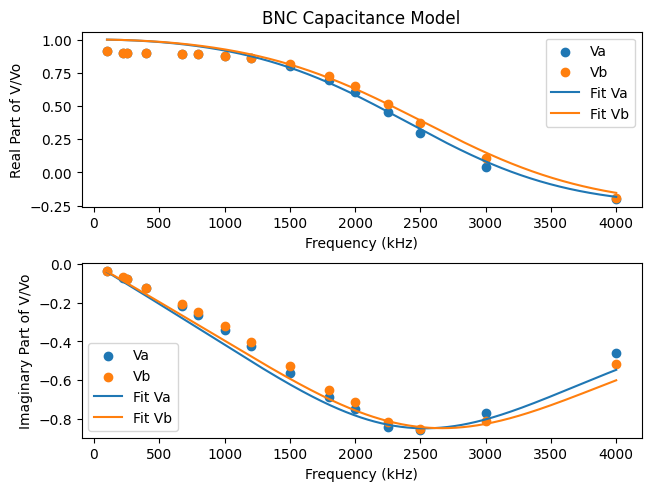

In [3]:
def ParCapmodel(omega, L,C,R):#Va across resistor with capacitor in parallel
    return np.append((1-L*C*1e-12*(omega**2))/((1-L*C*1e-12*(omega**2))**2+(L*omega/R)**2),-(L*omega/R)/((1-L*C*1e-12*(omega**2))**2+(L*omega/R)**2)) #capacitance is in units of pF
guesses1 = [70e-6,1,1000]
pbounds1 = np.array([[1e-8,1e-3,1e0],[1e-3,1e3,1e5]]) # [[Lower bounds],[upper bounds]]
bestfit = optimize.curve_fit(ParCapmodel,omegas,np.append(np.real(Vas),np.imag(Vas)),guesses1, bounds=pbounds1)
bestpars1 = bestfit[0]
print('Coil 1 Inductance = \t',bestpars1[0]*1e6, '\u03BC'+'H')
print('BNC 1 Capacitance = \t',bestpars1[1], 'pF')
print('Resistor 1 = \t\t',bestpars1[2], '\u03A9\n')

guesses2 = [100e-6,1,1000]
pbounds2 = pbounds1 # [[Lower bounds],[upper bounds]]
bestfit = optimize.curve_fit(ParCapmodel,omegas,np.append(np.real(Vbs),np.imag(Vbs)),guesses2, bounds=pbounds2)
bestpars2 = bestfit[0]
print('Coil 2 Inductance = \t',bestpars2[0]*1e6, '\u03BC'+'H')
print('BNC 2 Capacitance = \t',bestpars2[1], 'pF')
print('Resistor 2 = \t\t',bestpars2[2], '\u03A9')



# gx1 = (1-guesses1[0]*guesses1[1]*1e-12*(omegas**2))/((1-guesses1[0]*guesses1[1]*1e-12*(omegas**2))**2+(guesses1[0]*omegas/guesses1[2])**2)
# gx2 = (1-guesses2[0]*guesses2[1]*1e-12*(omegas**2))/((1-guesses2[0]*guesses2[1]*1e-12*(omegas**2))**2+(guesses2[0]*omegas/guesses2[2])**2)
# gy1 = -(guesses1[0]*omegas/guesses1[2])/((1-guesses1[0]*guesses1[1]*1e-12*(omegas**2))**2+(guesses1[0]*omegas/guesses1[2])**2)
# gy2 = -(guesses2[0]*omegas/guesses2[2])/((1-guesses2[0]*guesses2[1]*1e-12*(omegas**2))**2+(guesses2[0]*omegas/guesses2[2])**2)

fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(2, 1, 1)
bx = fig.add_subplot(2, 1, 2)
ax.scatter(omegas/2/np.pi/1000,np.real(Vas))
ax.scatter(omegas/2/np.pi/1000,np.real(Vbs))
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Real Part of V/Vo')
ax.set_title('BNC Capacitance Model')


bx.scatter(omegas/2/np.pi/1000,np.imag(Vas))
bx.scatter(omegas/2/np.pi/1000,np.imag(Vbs))
bx.set_xlabel('Frequency (kHz)')
bx.set_ylabel('Imaginary Part of V/Vo')

omegas2 = np.linspace(omegas[0],omegas[-1],1000)

mx1 = (1-bestpars1[0]*bestpars1[1]*1e-12*(omegas2**2))/((1-bestpars1[0]*bestpars1[1]*1e-12*(omegas2**2))**2+(bestpars1[0]*omegas2/bestpars1[2])**2)
mx2 = (1-bestpars2[0]*bestpars2[1]*1e-12*(omegas2**2))/((1-bestpars2[0]*bestpars2[1]*1e-12*(omegas2**2))**2+(bestpars2[0]*omegas2/bestpars2[2])**2)
my1 = -(bestpars1[0]*omegas2/bestpars1[2])/((1-bestpars1[0]*bestpars1[1]*1e-12*(omegas2**2))**2+(bestpars1[0]*omegas2/bestpars1[2])**2)
my2 = -(bestpars2[0]*omegas2/bestpars2[2])/((1-bestpars2[0]*bestpars2[1]*1e-12*(omegas2**2))**2+(bestpars2[0]*omegas2/bestpars2[2])**2)


ax.plot(omegas2/2/np.pi/1000,mx1)
ax.plot(omegas2/2/np.pi/1000,mx2)
bx.plot(omegas2/2/np.pi/1000,my1)
bx.plot(omegas2/2/np.pi/1000,my2)
# ax.plot(omegas/2/np.pi/1000,gx1)
# ax.plot(omegas/2/np.pi/1000,gx2)
# bx.plot(omegas/2/np.pi/1000,gy1)
# bx.plot(omegas/2/np.pi/1000,gy2)
ax.legend(['Va','Vb','Fit Va','Fit Vb','Guess Va','Guess Vb'])
bx.legend(['Va','Vb','Fit Va','Fit Vb','Guess Va','Guess Vb'])
a = 1

Coil 1 Inductance = 	 39.038441253727235 μH
BNC 1 Capacitance = 	 55.94209098028403 pF
Resistor 1 = 		 647.9509733714965 Ω
Coil 1 Capacitance = 	 9.18720575751141 pF

Coil 2 Inductance = 	 37.63249521828715 μH
BNC 2 Capacitance = 	 52.27155987750822 pF
Resistor 2 = 		 657.1500397639825 Ω
Coil 2 Capacitance = 	 9.000843899871777 pF


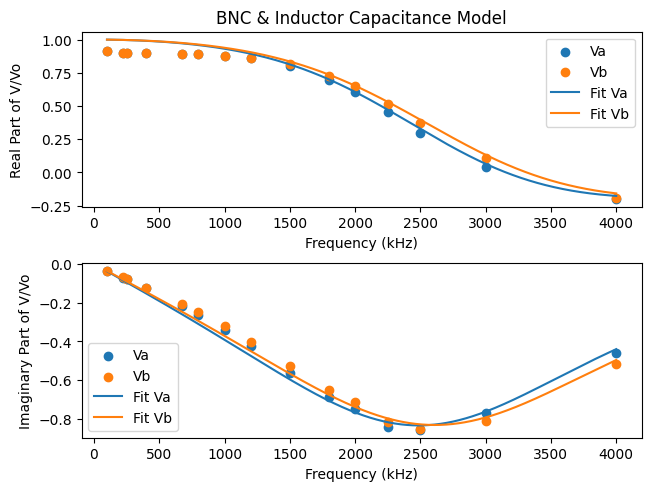

In [4]:
def ParCapmodel(omega, L,C,R,Cl):#Va across resistor with capacitor in parallel and capacitance of inductor
    A = 1/(omega*Cl*1e-12-1/(L*omega))
    B = 1/((1+A*omega*C*1e-12)**2+(A/R)**2)
    return np.append(B*(1+A*omega*C*1e-12),B*A/R)

guesses1 = [70e-6,1,1000,1e-2]
pbounds1 = np.array([[1e-8,1e-3,1e0,1e-3],[1e-3,1e3,1e5,1e3]]) # [[Lower bounds],[upper bounds]]
bestfit = optimize.curve_fit(ParCapmodel,omegas,np.append(np.real(Vas),np.imag(Vas)),guesses1, bounds=pbounds1)
bestpars1 = bestfit[0]
print('Coil 1 Inductance = \t',bestpars1[0]*1e6, '\u03BC'+'H')
print('BNC 1 Capacitance = \t',bestpars1[1], 'pF')
print('Resistor 1 = \t\t',bestpars1[2], '\u03A9')
print('Coil 1 Capacitance = \t',bestpars1[3], 'pF\n')

guesses2 = [70e-6,1,1000,1e-2]
pbounds2 = pbounds1 # [[Lower bounds],[upper bounds]]
bestfit = optimize.curve_fit(ParCapmodel,omegas,np.append(np.real(Vbs),np.imag(Vbs)),guesses2, bounds=pbounds2)
bestpars2 = bestfit[0]
print('Coil 2 Inductance = \t',bestpars2[0]*1e6, '\u03BC'+'H')
print('BNC 2 Capacitance = \t',bestpars2[1], 'pF')
print('Resistor 2 = \t\t',bestpars2[2], '\u03A9')
print('Coil 2 Capacitance = \t',bestpars2[3], 'pF')

fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(2, 1, 1)
bx = fig.add_subplot(2, 1, 2)
ax.scatter(omegas/2/np.pi/1000,np.real(Vas))
ax.scatter(omegas/2/np.pi/1000,np.real(Vbs))
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Real Part of V/Vo')
ax.set_title('BNC & Inductor Capacitance Model')


bx.scatter(omegas/2/np.pi/1000,np.imag(Vas))
bx.scatter(omegas/2/np.pi/1000,np.imag(Vbs))
bx.set_xlabel('Frequency (kHz)')
bx.set_ylabel('Imaginary Part of V/Vo')

A1 = 1/(omegas2*bestpars1[3]*1e-12-1/(bestpars1[0]*omegas2))
B1 = 1/((1+A1*omegas2*bestpars1[1]*1e-12)**2+(A1/bestpars1[2])**2)
A2 = 1/(omegas2*bestpars2[3]*1e-12-1/(bestpars2[0]*omegas2))
B2 = 1/((1+A2*omegas2*bestpars2[1]*1e-12)**2+(A2/bestpars2[2])**2)

mx1 = B1*(1+A1*omegas2*bestpars1[1]*1e-12)
mx2 = B2*(1+A2*omegas2*bestpars2[1]*1e-12)
my1 = B1*A1/bestpars1[2]
my2 = B2*A2/bestpars2[2]


ax.plot(omegas2/2/np.pi/1000,mx1)
ax.plot(omegas2/2/np.pi/1000,mx2)
bx.plot(omegas2/2/np.pi/1000,my1)
bx.plot(omegas2/2/np.pi/1000,my2)
ax.legend(['Va','Vb','Fit Va','Fit Vb','Guess Va','Guess Vb'])
bx.legend(['Va','Vb','Fit Va','Fit Vb','Guess Va','Guess Vb'])
a = 1

Coil 1 Inductance = 	 47.22163340994111 μH
BNC 1 Capacitance = 	 59.55313656914002 pF
Resistor 1 = 		 820.2213652219373 Ω
Coil 1 Capacitance = 	 4.049368250802616 pF
Coil 1 Resistance = 	 80.75878123415441 Ω

Coil 2 Inductance = 	 44.21303979513513 μH
BNC 2 Capacitance = 	 58.36270802611139 pF
Resistor 2 = 		 809.349961051233 Ω
Coil 2 Capacitance = 	 3.7759456458821794 pF
Coil 2 Resistance = 	 82.78822871670947 Ω

Impedance is matched at 632.116698067551 kHz


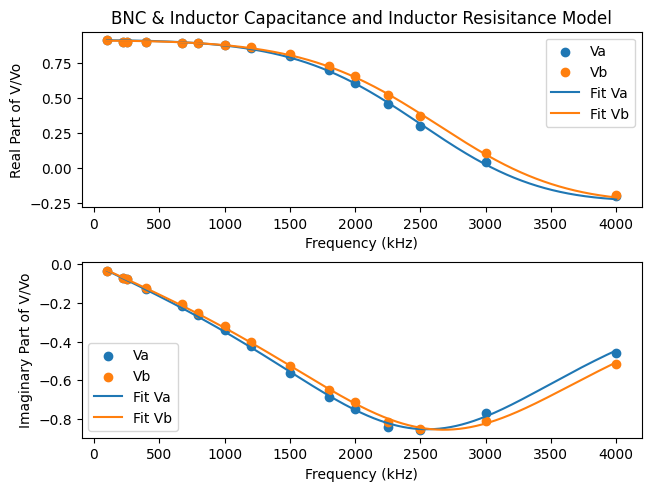

In [13]:
def ParCapmodel(omega, L,C,R,Cl,Rl):#Va across resistor with capacitor in parallel and capacitance of inductor
    A = 1/(Rl**2+(omega*L)**2)
    B = 1/((A*Rl)**2+(omega*(Cl*1e-12-A*L))**2)
    D = 1/((1+B*((A*Rl)/R+omega**2*C*1e-12*(Cl*1e-12-A*L)))**2+(B*omega*(A*Rl*C*1e-12-(Cl*1e-12-A*L)/R))**2)
    return np.append(D*(1+B*(A*Rl/R+omega**2*C*1e-12*(Cl*1e-12-A*L))),-B*D*omega*(A*Rl*C*1e-12-(Cl*1e-12-A*L)/R))

guesses1 = [70e-6,100,800,10,10]
pbounds1 = np.array([[1e-8,1e-3,1e0,1e-3,1e-2],[1e-3,1e3,1e5,1e3,2e2]]) # [[Lower bounds],[upper bounds]]
bestfit = optimize.curve_fit(ParCapmodel,omegas,np.append(np.real(Vas),np.imag(Vas)),guesses1, bounds=pbounds1)
bestpars1 = bestfit[0]
print('Coil 1 Inductance = \t',bestpars1[0]*1e6, '\u03BC'+'H')
print('BNC 1 Capacitance = \t',bestpars1[1], 'pF')
print('Resistor 1 = \t\t',bestpars1[2], '\u03A9')
print('Coil 1 Capacitance = \t',bestpars1[3], 'pF')
print('Coil 1 Resistance = \t',bestpars1[4], '\u03A9\n')

guesses2 = [70e-6,100,800,10,10]
pbounds2 = pbounds1 # [[Lower bounds],[upper bounds]]
bestfit = optimize.curve_fit(ParCapmodel,omegas,np.append(np.real(Vbs),np.imag(Vbs)),guesses2, bounds=pbounds2)
bestpars2 = bestfit[0]
print('Coil 2 Inductance = \t',bestpars2[0]*1e6, '\u03BC'+'H')
print('BNC 2 Capacitance = \t',bestpars2[1], 'pF')
print('Resistor 2 = \t\t',bestpars2[2], '\u03A9')
print('Coil 2 Capacitance = \t',bestpars2[3], 'pF')
print('Coil 2 Resistance = \t',bestpars2[4], '\u03A9\n')

fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(2, 1, 1)
bx = fig.add_subplot(2, 1, 2)
ax.scatter(omegas/2/np.pi/1000,np.real(Vas))
ax.scatter(omegas/2/np.pi/1000,np.real(Vbs))
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Real Part of V/Vo')
ax.set_title('BNC & Inductor Capacitance and Inductor Resisitance Model')

bx.scatter(omegas/2/np.pi/1000,np.imag(Vas))
bx.scatter(omegas/2/np.pi/1000,np.imag(Vbs))
bx.set_xlabel('Frequency (kHz)')
bx.set_ylabel('Imaginary Part of V/Vo')

A1 = 1/(bestpars1[4]**2+(omegas2*bestpars1[0])**2)
B1 = 1/((A1*bestpars1[4])**2+(omegas2*(bestpars1[3]*1e-12-A1*bestpars1[0]))**2)
D1 = 1/((1+B1*((A1*bestpars1[4])/bestpars1[2]+omegas2**2*bestpars1[1]*1e-12*(bestpars1[3]*1e-12-A1*bestpars1[0])))**2+(B1*omegas2*(A1*bestpars1[4]*bestpars1[1]*1e-12-(bestpars1[3]*1e-12-A1*bestpars1[0])/bestpars1[2]))**2)

A2 = 1/(bestpars2[4]**2+(omegas2*bestpars2[0])**2)
B2 = 1/((A2*bestpars2[4])**2+(omegas2*(bestpars2[3]*1e-12-A2*bestpars2[0]))**2)
D2 = 1/((1+B2*((A2*bestpars2[4])/bestpars2[2]+omegas2**2*bestpars2[1]*1e-12*(bestpars2[3]*1e-12-A2*bestpars2[0])))**2+(B2*omegas2*(A2*bestpars2[4]*bestpars2[1]*1e-12-(bestpars2[3]*1e-12-A2*bestpars2[0])/bestpars2[2]))**2)

mx1 = D1*(1+B1*(A1*bestpars1[4]/bestpars1[2]+omegas2**2*bestpars1[1]*1e-12*(bestpars1[3]*1e-12-A1*bestpars1[0])))
mx2 = D2*(1+B2*(A2*bestpars2[4]/bestpars2[2]+omegas2**2*bestpars2[1]*1e-12*(bestpars2[3]*1e-12-A2*bestpars2[0])))
my1 = -B1*D1*omegas2*(A1*bestpars1[4]*bestpars1[1]*1e-12-(bestpars1[3]*1e-12-A1*bestpars1[0])/bestpars1[2])
my2 = -B2*D2*omegas2*(A2*bestpars2[4]*bestpars2[1]*1e-12-(bestpars2[3]*1e-12-A2*bestpars2[0])/bestpars2[2])


ax.plot(omegas2/2/np.pi/1000,mx1)
ax.plot(omegas2/2/np.pi/1000,mx2)
bx.plot(omegas2/2/np.pi/1000,my1)
bx.plot(omegas2/2/np.pi/1000,my2)
ax.legend(['Va','Vb','Fit Va','Fit Vb'])
bx.legend(['Va','Vb','Fit Va','Fit Vb'])

#solve expr1 = 0
omegas3 = 2*np.pi*np.linspace(1000,4000000,1000)
expr1 = (1/(bestpars1[2]*2.5/10))**2+(omegas3*bestpars1[1]*1e-12)**2-(bestpars1[4]/(bestpars1[4]**2+(omegas3*bestpars1[0])**2))**2-(omegas3*(bestpars1[3]*1e-12-bestpars1[0]/(bestpars1[4]**2+(omegas3*bestpars1[0])**2)))**2

#visualize when expr1 = 0
# fig2 = plt.figure(constrained_layout = True)
# cx = fig2.add_subplot(1, 1, 1)
# cx.plot(omegas3/2/np.pi/1000,expr1)
# cx.plot([omegas3[0]/2/np.pi/1000,omegas3[-1]/2/np.pi/1000],[0,0])

omega_matched = np.interp(0,expr1,omegas3)
print('Impedance is matched at',omega_matched/2/np.pi/1000,'kHz')

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def average_data(V,freqs):
    combos = []
    fs = [*set(freqs)]
    fs.sort()
    for i, f in enumerate(fs):
        combos.append([])
        for j, freq in enumerate(freqs):
            if f == freq:
                combos[i].append(V[j])
    vout = []
    vstd = []
    for combo in combos:
        vout.append(np.mean(combo))
        vstd.append(np.std(combo))
    return np.array(vout),np.array(vstd)

path_prefix = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/'
path_suffix = '.dat'
filename1 = 'EmptyFRA_BW79_1'
filename2 = 'BW79_1FRA4'
data_path1 = path_prefix + filename1 + path_suffix
data_path2 = path_prefix + filename2 + path_suffix

all_data = np.genfromtxt(data_path1, delimiter='\t')
t1 = np.array(all_data[1:,0])
T1 = np.array(all_data[1:,1])
freq1 = np.array(all_data[1:,2])
x1 = np.array(all_data[1:,3])/2
x1,x1err = average_data(x1,freq1)
y1 = np.array(all_data[1:,4])/2
y1,y1err = average_data(y1,freq1)
freq1 = [*set(freq1)]
freq1.sort()
freq1 = np.array(freq1)*1000

all_data = np.genfromtxt(data_path2, delimiter='\t')
t2 = np.array(all_data[1:,0])
T2 = np.array(all_data[1:,1])
freq2 = np.array(all_data[1:,2])
x2 = np.array(all_data[1:,3])/2
x2,x2err = average_data(x2,freq2)
y2 = np.array(all_data[1:,4])/2
y2,y2err = average_data(y2,freq2)
freq2 = [*set(freq2)]
freq2.sort()
freq2 = np.array(freq2)*1000

Model For Va-Vb with C_L=0

Resistor 1 = 		 738.6831409309773 Ω
Resistor 2 = 		 368.4238095826551 Ω
BNC 1 Capacitance = 	 23.14227379820866 pF
Coil 1 Inductance = 	 56.50330701857371 μH
Coil 2 Inductance = 	 28.643781524609356 μH
Coil 1 Resistance = 	 2.1121290397630483 Ω
Coil 2 Resistance = 	 1.150054296881532 Ω

Resistor 1 = 		 638.7444981009085 Ω
Resistor 2 = 		 313.15243419105144 Ω
BNC 1 Capacitance = 	 21.25425233066333 pF
Coil 1 Inductance = 	 58.25999497645085 μH
Coil 2 Inductance = 	 29.064464085913933 μH
Coil 1 Resistance = 	 4.885284820725367 Ω
Coil 2 Resistance = 	 2.496714888630188 Ω



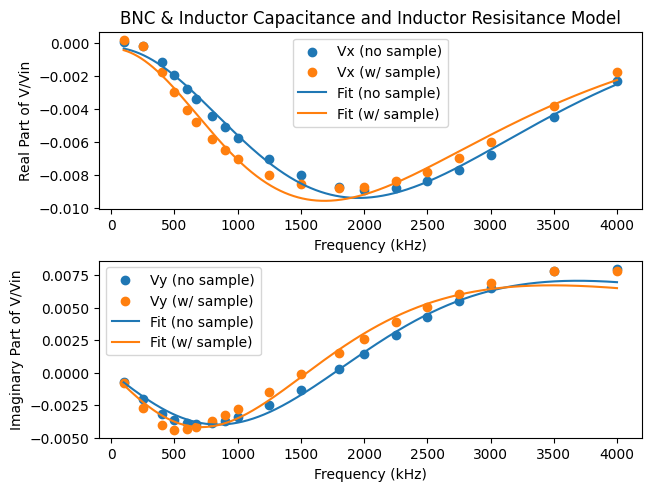

In [30]:
def ParCapmodel(omega, R1,R2,C,L1,L2,Rl1,Rl2):#Va across resistor with capacitor in parallel and capacitance of inductor
    A = Rl1*R2-R1*Rl2
    B = omega*(R2*L1-R1*L2)
    F = R1*R2 +Rl1*Rl2-L1*L2*(omega**2)+R2*Rl1+R1*Rl2-C*1e-12*(omega**2)*((R1+R2)*(Rl1*L2+Rl2*L1)+R1*R2*(L1+L2))
    D = omega*(L1*(R2+Rl2)+L2*(R1+Rl1)+C*1e-12*((R1+R2)*(Rl1*Rl2-L1*L2*(omega**2))+R1*R2*(Rl1+Rl2)))
    return np.append((A*F+B*D)/(F**2+D**2),(B*F-A*D)/(F**2+D**2))

guesses1 = [200,200,100,50e-6,50e-6,80,80]
pbounds1 = np.array([[1,1,1,1e-6,1e-6,1,1],[1e3,1e3,1e3,1e-3,1e-3,1e3,1e3]]) # [[Lower bounds],[upper bounds]]
try:
    bestfit = optimize.curve_fit(ParCapmodel,freq1*2*np.pi,np.append(x1,y1),guesses1, bounds=pbounds1)
except:
    pass
bestpars1 = bestfit[0]

print('Resistor 1 = \t\t',bestpars1[0], '\u03A9')
print('Resistor 2 = \t\t',bestpars1[1], '\u03A9')
print('BNC 1 Capacitance = \t',bestpars1[2], 'pF')
print('Coil 1 Inductance = \t',bestpars1[3]*1e6, '\u03BC'+'H')
print('Coil 2 Inductance = \t',bestpars1[4]*1e6, '\u03BC'+'H')
# print('Coil 1 Capacitance = \t',bestpars1[3], 'pF')
print('Coil 1 Resistance = \t',bestpars1[5], '\u03A9')
print('Coil 2 Resistance = \t',bestpars1[6], '\u03A9\n')

guesses2 = guesses1
pbounds2 = pbounds1 # [[Lower bounds],[upper bounds]]
try:
    bestfit = optimize.curve_fit(ParCapmodel,freq2*2*np.pi,np.append(x2,y2),guesses2, bounds=pbounds2)
except:
    pass
bestpars2 = bestfit[0]
print('Resistor 1 = \t\t',bestpars2[0], '\u03A9')
print('Resistor 2 = \t\t',bestpars2[1], '\u03A9')
print('BNC 1 Capacitance = \t',bestpars2[2], 'pF')
print('Coil 1 Inductance = \t',bestpars2[3]*1e6, '\u03BC'+'H')
print('Coil 2 Inductance = \t',bestpars2[4]*1e6, '\u03BC'+'H')
print('Coil 1 Resistance = \t',bestpars2[5], '\u03A9')
print('Coil 2 Resistance = \t',bestpars2[6], '\u03A9\n')

fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(2, 1, 1)
bx = fig.add_subplot(2, 1, 2)
ax.scatter(freq1/1000,x1)
ax.scatter(freq2/1000,x2)
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Real Part of V/Vin')
ax.set_title('BNC & Inductor Capacitance and Inductor Resisitance Model')

bx.scatter(freq1/1000,y1)
bx.scatter(freq2/1000,y2)
bx.set_xlabel('Frequency (kHz)')
bx.set_ylabel('Imaginary Part of V/Vin')

# [R1,R2,C,L1,L2,Rl1,Rl2] best pars
# A = Rl1*R2-R1*Rl2
# B = omega*(R2*L1-R1*L2)
# F = R1*R2 +Rl1*Rl2-L1*L2*(omega**2)+R2*Rl1+R1*Rl2-C*1e-12*(omega**2)*((R1+R2)*(Rl1*L2+Rl2*L1)+R1*R2*(L1+L2))
# D = omega*(L1*(R2+Rl2)+L2*(R1+Rl1)+C*1e-12*((R1+R2)*(Rl1*Rl2-L1*L2*(omega**2))+R1*R2*(Rl1+Rl2)))
freqs = np.linspace(min(freq1.min(),freq2.min()),max(freq1.max(),freq2.max()),1000)
A1 = bestpars1[5]*bestpars1[1]-bestpars1[0]*bestpars1[6]
B1 = (freqs*np.pi*2)*(bestpars1[1]*bestpars1[3]-bestpars1[0]*bestpars1[4])
F1 = bestpars1[0]*bestpars1[1] +bestpars1[5]*bestpars1[6]-bestpars1[3]*bestpars1[4]*((freqs*np.pi*2)**2)+bestpars1[1]*bestpars1[5]+bestpars1[0]*bestpars1[6]-bestpars1[2]*1e-12*((freqs*np.pi*2)**2)*((bestpars1[0]+bestpars1[1])*(bestpars1[5]*bestpars1[4]+bestpars1[6]*bestpars1[3])+bestpars1[0]*bestpars1[1]*(bestpars1[3]+bestpars1[4]))
D1 = (freqs*np.pi*2)*(bestpars1[3]*(bestpars1[1]+bestpars1[6])+bestpars1[4]*(bestpars1[0]+bestpars1[5])+bestpars1[2]*1e-12*((bestpars1[0]+bestpars1[1])*(bestpars1[5]*bestpars1[6]-bestpars1[3]*bestpars1[4]*((freqs*np.pi*2)**2))+bestpars1[0]*bestpars1[1]*(bestpars1[5]+bestpars1[6])))

A2 = bestpars2[5]*bestpars2[1]-bestpars2[0]*bestpars2[6]
B2 = (freqs*np.pi*2)*(bestpars2[1]*bestpars2[3]-bestpars2[0]*bestpars2[4])
F2 = bestpars2[0]*bestpars2[1] +bestpars2[5]*bestpars2[6]-bestpars2[3]*bestpars2[4]*((freqs*np.pi*2)**2)+bestpars2[1]*bestpars2[5]+bestpars2[0]*bestpars2[6]-bestpars2[2]*1e-12*((freqs*np.pi*2)**2)*((bestpars2[0]+bestpars2[1])*(bestpars2[5]*bestpars2[4]+bestpars2[6]*bestpars2[3])+bestpars2[0]*bestpars2[1]*(bestpars2[3]+bestpars2[4]))
D2 = (freqs*np.pi*2)*(bestpars2[3]*(bestpars2[1]+bestpars2[6])+bestpars2[4]*(bestpars2[0]+bestpars2[5])+bestpars2[2]*1e-12*((bestpars2[0]+bestpars2[1])*(bestpars2[5]*bestpars2[6]-bestpars2[3]*bestpars2[4]*((freqs*np.pi*2)**2))+bestpars2[0]*bestpars2[1]*(bestpars2[5]+bestpars2[6])))

mx1 = (A1*F1+B1*D1)/(F1**2+D1**2)
mx2 = (A2*F2+B2*D2)/(F2**2+D2**2)
my1 = (B1*F1-A1*D1)/(F1**2+D1**2)
my2 = (B2*F2-A2*D2)/(F2**2+D2**2)



ax.plot(freqs/1000,mx1)
ax.plot(freqs/1000,mx2)
bx.plot(freqs/1000,my1)
bx.plot(freqs/1000,my2)
ax.legend(['Vx (no sample)','Vx (w/ sample)','Fit (no sample)','Fit (w/ sample)'])
_ = bx.legend(['Vy (no sample)','Vy (w/ sample)','Fit (no sample)','Fit (w/ sample)'])

#solve expr1 = 0
# omegas3 = 2*np.pi*np.linspace(1000,4000000,1000)
# expr1 = (1/(bestpars1[2]*2.5/10))**2+(omegas3*bestpars1[1]*1e-12)**2-(bestpars1[4]/(bestpars1[4]**2+(omegas3*bestpars1[0])**2))**2-(omegas3*(bestpars1[3]*1e-12-bestpars1[0]/(bestpars1[4]**2+(omegas3*bestpars1[0])**2)))**2

#visualize when expr1 = 0
# fig2 = plt.figure(constrained_layout = True)
# cx = fig2.add_subplot(1, 1, 1)
# cx.plot(omegas3/2/np.pi/1000,expr1)
# cx.plot([omegas3[0]/2/np.pi/1000,omegas3[-1]/2/np.pi/1000],[0,0])

# omega_matched = np.interp(0,expr1,omegas3)
# print('Impedance is matched at',omega_matched/2/np.pi/1000,'kHz')